In [ ]:
import pandas as pd
import glob
import os

# Path to data folder
data_path = '../data/'

# List of all Uber CSV files for 2014
uber_files = sorted(glob.glob(os.path.join(data_path, 'uber-raw-data-*.csv')))

# Load and concatenate all CSVs
df_list = []
for file in uber_files:
    temp_df = pd.read_csv(file)
    df_list.append(temp_df)

df = pd.concat(df_list, ignore_index=True)
print(f"Shape of combined dataset: {df.shape}")
df.head()

Shape of combined dataset: (4534327, 4)


,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [3]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

df['Hour'] = df['Date/Time'].dt.hour
df['Day'] = df['Date/Time'].dt.day
df['Weekday'] = df['Date/Time'].dt.weekday
df['Month'] = df['Date/Time'].dt.month

df

,Date/Time,Lat,Lon,Base,Hour,Day,Weekday,Month
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,0,1,1,4
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,0,1,1,4
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,0,1,1,4
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,0,1,1,4
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,0,1,1,4
...,...,...,...,...,...,...,...,...
4534322,2014-09-30 22:57:00,40.7668,-73.9845,B02764,22,30,1,9
4534323,2014-09-30 22:57:00,40.6911,-74.1773,B02764,22,30,1,9
4534324,2014-09-30 22:58:00,40.8519,-73.9319,B02764,22,30,1,9
4534325,2014-09-30 22:58:00,40.7081,-74.0066,B02764,22,30,1,9


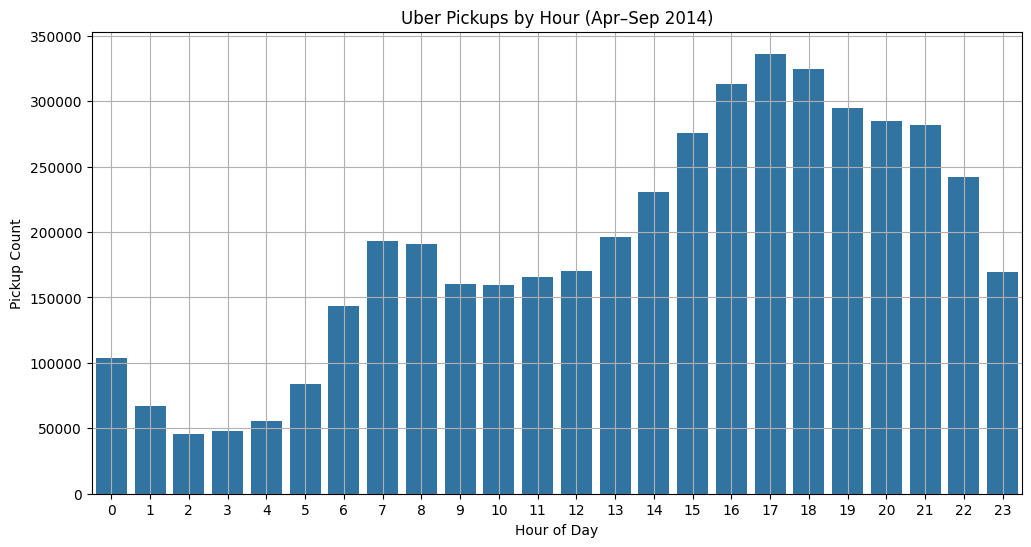

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(x='Hour', data=df)
plt.title('Uber Pickups by Hour (Apr-Sep 2014)')
plt.xlabel('Hour of Day')
plt.ylabel('Pickup Count')
plt.grid(True)
plt.show()

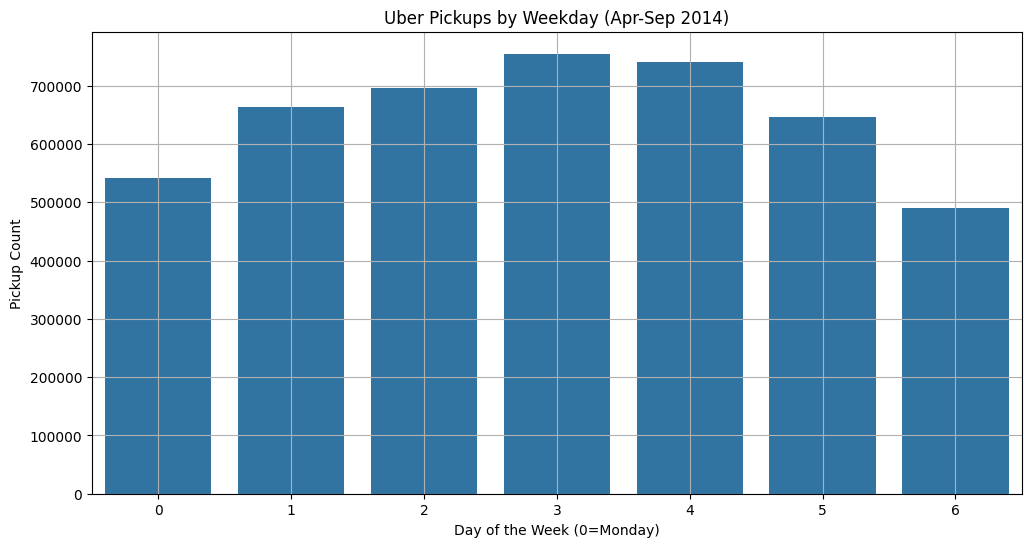

In [5]:
plt.figure(figsize=(12,6))
sns.countplot(x='Weekday', data=df)
plt.title('Uber Pickups by Weekday (Apr-Sep 2014)')
plt.xlabel('Day of the Week (0=Monday)')
plt.ylabel('Pickup Count')
plt.grid(True)
plt.show()

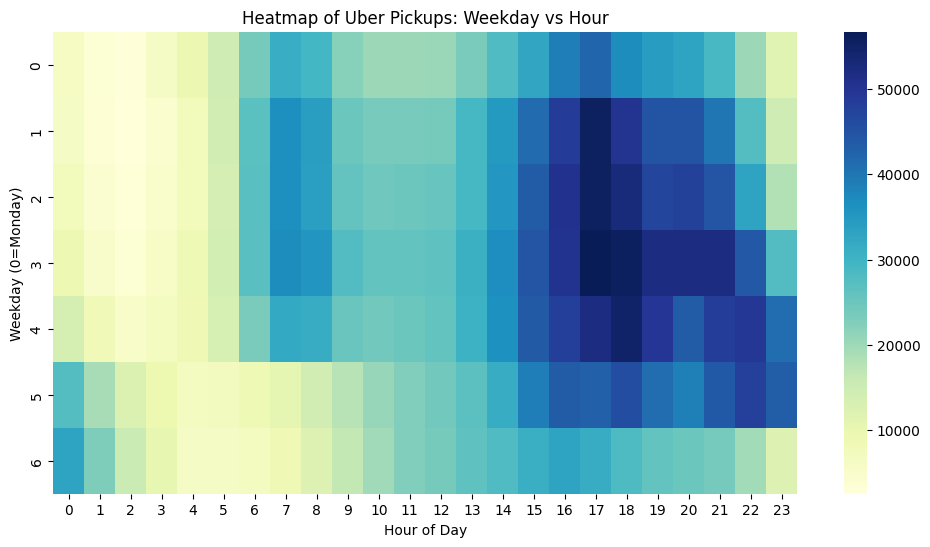

In [6]:
heatmap_data = df.groupby(['Weekday', 'Hour']).size().unstack()
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Heatmap of Uber Pickups: Weekday vs Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Weekday (0=Monday)')
plt.show()

In [7]:
df['Date_Hour'] = df['Date/Time'].dt.floor('H')

demand_data = df.groupby('Date_Hour').size().reset_index(name='Pickup_Count')

demand_data['Hour'] = demand_data['Date_Hour'].dt.hour
demand_data['Weekday'] = demand_data['Date_Hour'].dt.weekday
demand_data['Day'] = demand_data['Date_Hour'].dt.day
demand_data['Month'] = demand_data['Date_Hour'].dt.month

demand_data.head()

C:\Users\saksh\AppData\Local\Temp\ipykernel_36132\593675977.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['Date_Hour'] = df['Date/Time'].dt.floor('H')


,Date_Hour,Pickup_Count,Hour,Weekday,Day,Month
0,2014-04-01 00:00:00,138,0,1,1,4
1,2014-04-01 01:00:00,66,1,1,1,4
2,2014-04-01 02:00:00,53,2,1,1,4
3,2014-04-01 03:00:00,93,3,1,1,4
4,2014-04-01 04:00:00,166,4,1,1,4


In [8]:
from sklearn.model_selection import train_test_split

X = demand_data[['Hour', 'Weekday', 'Day', 'Month']]
y = demand_data['Pickup_Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

RMSE: 473.11409418004166
R2 Score: 0.4859000904049203


In [11]:
df_model = pd.get_dummies(df, columns=['Weekday'], drop_first=True)

In [13]:
df_model = df.groupby(['Hour', 'Day', 'Month', 'Weekday']).size().reset_index(name='Pickup_Count')

features = ['Hour', 'Day', 'Month'] + [col for col in df_model.columns if 'Weekday_' in col]
X = df_model[features]
y = df_model['Pickup_Count']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

RMSE: 464.47559720166964
R2 Score: 0.4559320023520551


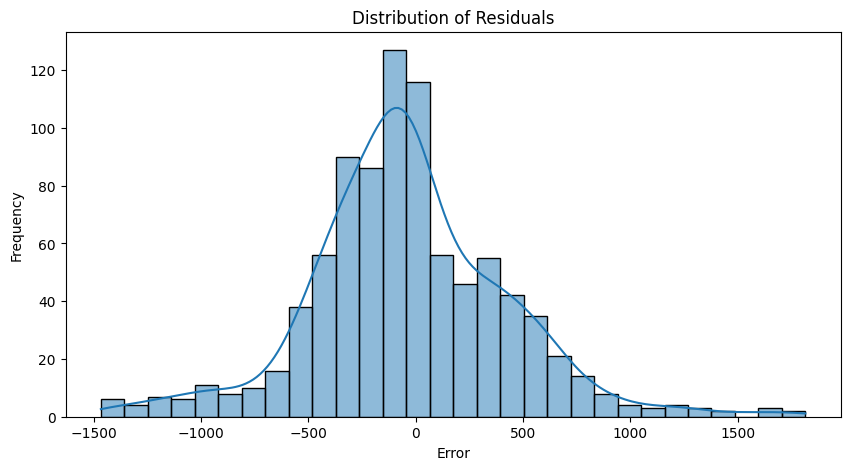

In [16]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)

print("RF RMSE:", np.sqrt(mean_squared_error(y_test, y_rf_pred)))
print("RF R2 Score:", r2_score(y_test, y_rf_pred))

RF RMSE: 265.7228872254879
RF R2 Score: 0.8219322369679339


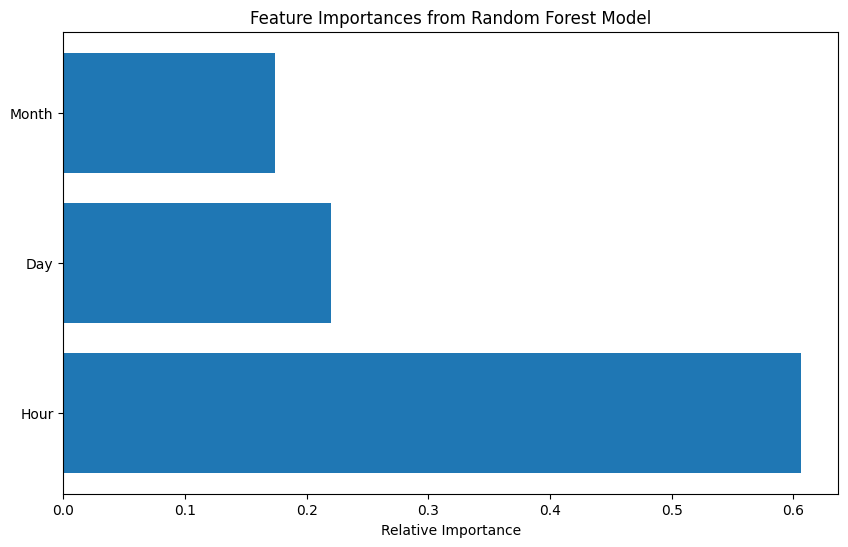

In [18]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_

feature_names = X.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances from Random Forest Model")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel("Relative Importance")
plt.show()